# Churn Prediction Project

## Data Preparation

In [86]:
# gerekli kütüphanelerin indirilmesi ve içe aktarılması.

In [87]:
!pip3 install dython
!pip3 install inflection
!pip3 install shap
# basic
import pandas as pd
import numpy as np

# association between attributes
from dython.nominal import associations

# CamelCase to snake_case format
import inflection

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)
# change the display precision for better viz
pd.set_option('display.precision', 3)

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# explainable AI
import shap
     



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [88]:
data = pd.read_csv("/Users/data/Desktop/Telco/Customer_Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [89]:
# Hedef değişken, veri tablosundaki churn adlı son sütundur. evet veya hayır olarak iki benzersiz değerdir

In [90]:
# veri setine bakış
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [91]:
df=data
# 'TotalCharges' sütununu nümerik değere dönüştür
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# NaN değerlerini kontrol et
print(df['TotalCharges'].isnull().sum())

# İsteğe bağlı: NaN değerleri ortalama ile doldurabilirsiniz
# df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Veya NaN değerleri içeren satırları çıkarabilirsiniz
# df.dropna(subset=['TotalCharges'], inplace=True)

# Son durumu kontrol et
print(df.info())


11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   objec

In [92]:
# ram kullanımını azaltabilmek adına veri tiplerinin optimizasyonunu yapıyoruz

In [93]:
import pandas as pd

df=data


# Sayısal sütunları optimize et
df['SeniorCitizen'] = df['SeniorCitizen'].astype('int16')
df['tenure'] = df['tenure'].astype('int16')
df['MonthlyCharges'] = df['MonthlyCharges'].astype('float32')

# Kategorik sütunları 'category' türüne dönüştür
kategorik_sutunlar = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                      'MultipleLines', 'InternetService', 'OnlineSecurity', 
                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                      'StreamingTV', 'StreamingMovies', 'Contract', 
                      'PaperlessBilling', 'PaymentMethod', 'Churn']

for sutun in kategorik_sutunlar:
    df[sutun] = df[sutun].astype('category')

# Gereksiz sütunu sil
# df.drop('customerID', axis=1, inplace=True)

# Bellek kullanımını kontrol et
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int16   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int16   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [94]:
data=df

In [95]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [97]:
# birbirinin aynısı olan satırların droplanması
data.duplicated().sum()


0

In [98]:
# droplanacak bir değer yok

In [99]:
# modelleme aşamasında id gibi unique değerleri kullanamayız, bu yüzden idleri dropladım

In [100]:
data.drop('customerID', axis=1, inplace=True)
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
# renaming the column in this format. Easy to read in a one look
column_list = list(data.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

data.columns = column_list
data.head()


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             7043 non-null   category
 1   senior_citizen     7043 non-null   int16   
 2   partner            7043 non-null   category
 3   dependents         7043 non-null   category
 4   tenure             7043 non-null   int16   
 5   phone_service      7043 non-null   category
 6   multiple_lines     7043 non-null   category
 7   internet_service   7043 non-null   category
 8   online_security    7043 non-null   category
 9   online_backup      7043 non-null   category
 10  device_protection  7043 non-null   category
 11  tech_support       7043 non-null   category
 12  streaming_tv       7043 non-null   category
 13  streaming_movies   7043 non-null   category
 14  contract           7043 non-null   category
 15  paperless_billing  7043 non-null   category
 16  paymen

In [103]:
# categoric değerler binary 
data.replace({'No phone service':'No',
            'No internet service':'No'},
            inplace=True)

data['senior_citizen'].replace({0:'No',
                                1:'Yes'},
                                inplace=True)


## EDA

In [104]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')


In [105]:
data_viz = data.copy()
data_viz.loc[:,'churn'] = data_viz.loc[:, 'churn'].apply(lambda x: 'churn' if x == 'Yes' else 'retain')


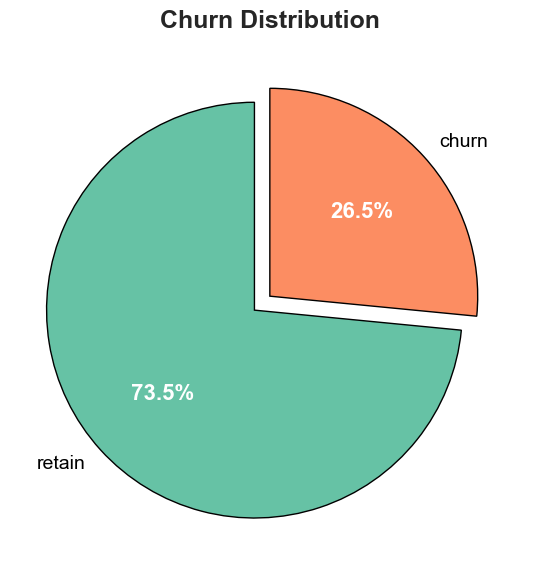

In [106]:
# Churn ve Retain kullanıcıların görselleştirilmesi
pie_data = data_viz['churn'].value_counts(normalize=True).values * 100
pie_label = data_viz['churn'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8, 6))


wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0.1, 0],  
                                  autopct='%1.1f%%',  
                                  colors=['#66c2a5', '#fc8d62'],  
                                  textprops={'color':'black', 'fontsize':14, 'weight':'normal'},  
                                  wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})


plt.setp(autotexts, size=16, weight="bold", color="white")  

ax.set_title('Churn Distribution', fontsize=18, fontweight='bold') 
plt.tight_layout()
plt.show()


In [107]:
data

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import inflection

def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True):
    if ax is None:
        _, ax = plt.subplots(figsize=(8,6))
    
    # Create crosstab
    crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index') * 100
    colors = ['#66c2a5', '#fc8d62']  # Custom colors

    if orient == 'vertical':
        crosstab.plot(kind='bar', stacked=True, color=colors, ax=ax)
    else:
        crosstab.plot(kind='barh', stacked=True, color=colors, ax=ax)

    ax.set_title(f'Customer Churn Probability by {inflection.titleize(x)}', fontsize=18, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Removing the frame for a clean look
    sns.despine(left=True, bottom=True)
    ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

    # Adding percentage labels directly on bars
    for n, rect in enumerate(ax.patches):
        width, height = rect.get_width(), rect.get_height()
        x, y = rect.get_xy()
        if orient == 'vertical':
            label_x = x + width / 2
            label_y = y + height / 2
            value = height
        else:
            label_x = x + width / 2
            label_y = y + height / 2
            value = width
        if value > 0:  # Only display label if the value is positive
            ax.text(label_x, label_y, f'{value:.1f}%', ha='center', va='center', color='white', fontsize=14, fontweight='bold')

    if show:
        plt.tight_layout()
        plt.show()



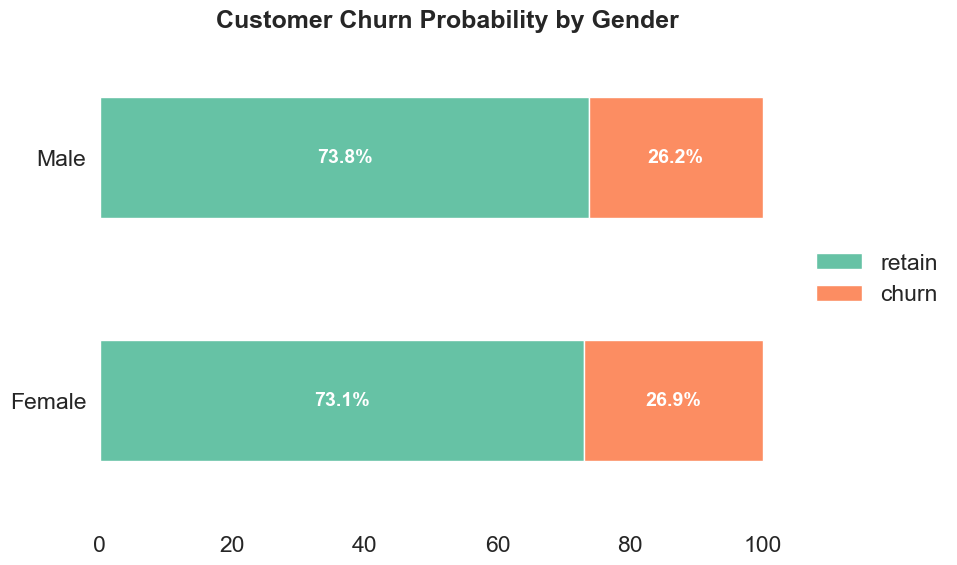

In [109]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='gender', y='churn', ax=ax, show=False)



plt.show()


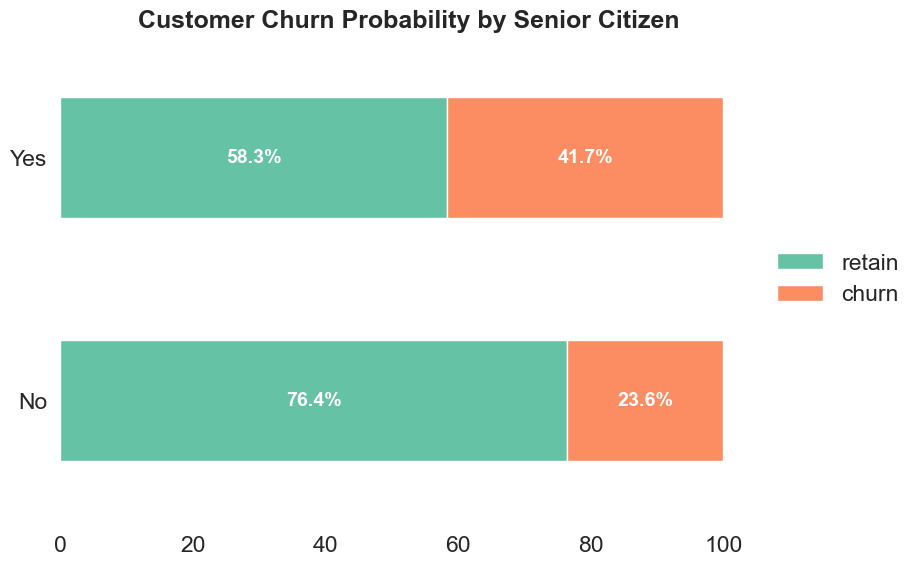

In [110]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='senior_citizen', y='churn', ax=ax, show=False)


plt.show()
     


In [111]:
columns = data_viz['churn']

attr_crosstab = pd.DataFrame()

for col in column_categorical:

  index = data_viz[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()



  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('churn', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()


,attribute,retain,churn
0,Payment Method (Electronic check),0.547146,0.452854
1,Contract (Month-to-month),0.572903,0.427097
2,Internet Service (Fiber optic),0.581072,0.418928
3,Senior Citizen (Yes),0.583187,0.416813
4,Paperless Billing (Yes),0.664349,0.335651
5,Partner (No),0.670420,0.329580
6,Online Security (No),0.686704,0.313296
7,Dependents (No),0.687209,0.312791
8,Tech Support (No),0.688138,0.311862
9,Streaming Tv (Yes),0.699298,0.300702




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.


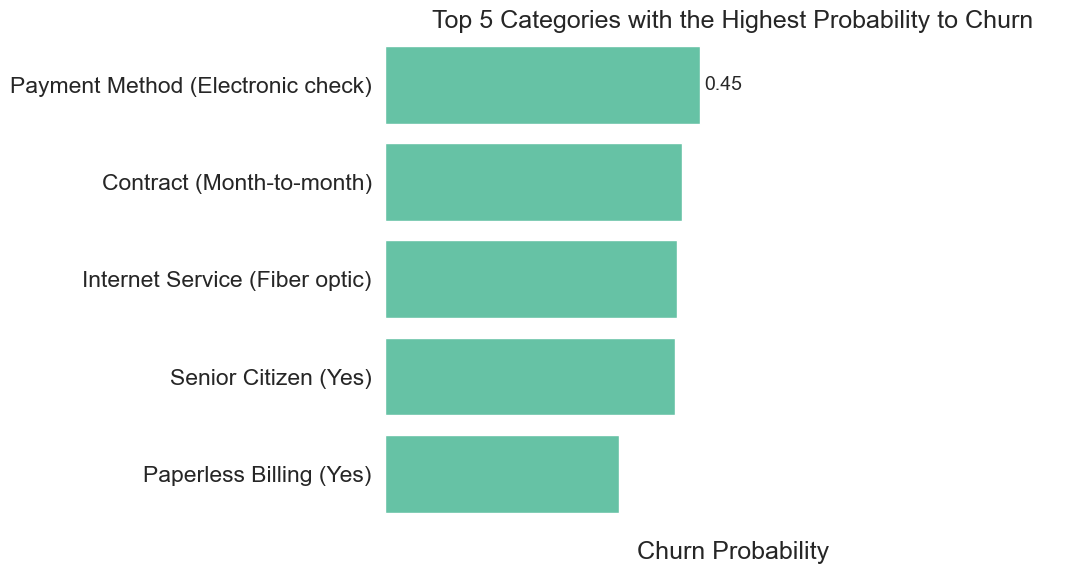

In [112]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[:5], x='churn', y='attribute', ax=ax, palette=['#66c2a5'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Highest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)

plt.show()
     




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.


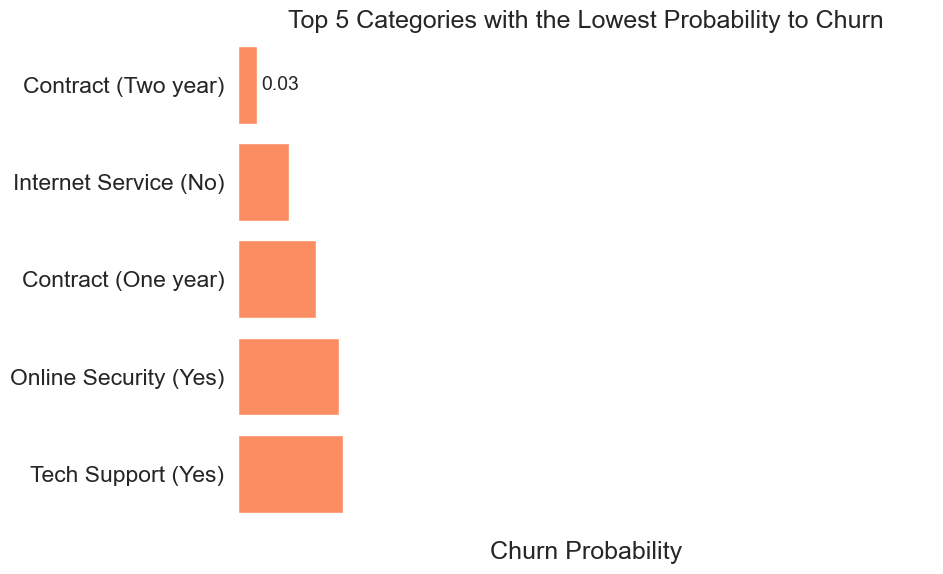

In [113]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[-5:].sort_values('churn'), x='churn', y='attribute', ax=ax, palette=['#fc8d62'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Lowest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)

plt.show()


In [114]:
# şimdi de numeric featureların churn oranlarıyla ilişkisini kontrol edeceğim


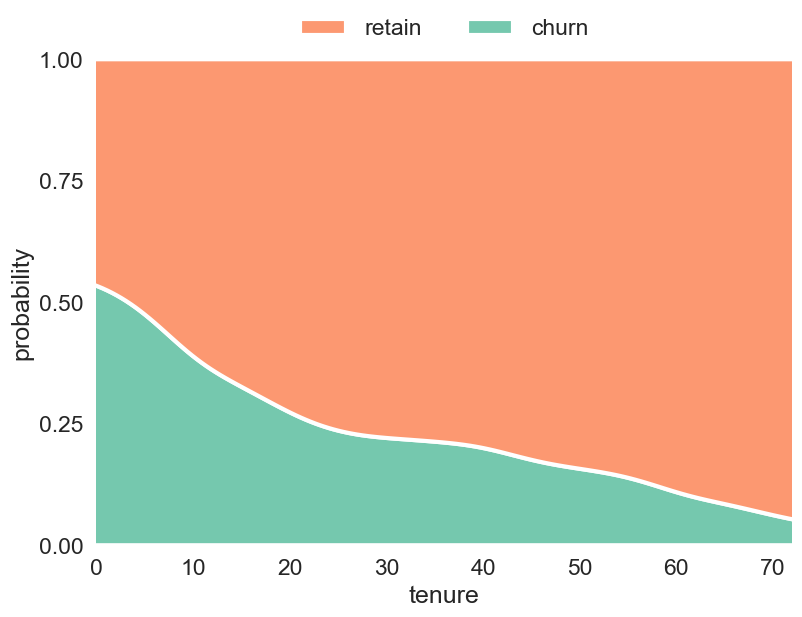

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))


colors = ['#fc8d62', '#66c2a5']


ax.grid(False, axis='x')
sns.kdeplot(data=data_viz, x='tenure', hue='churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9, palette=colors)

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0, data_viz['tenure'].max(), 10))
ax.set_xlim(data_viz['tenure'].min(), data_viz['tenure'].max())

ax.set_yticks(np.linspace(0, 1, 5))
ax.set_ylabel('probability')

sns.despine(left=True, bottom=True)

plt.show()


In [116]:
# müşterinin şirket müşterisi olarak geçirdiği süre arttıkça churn etme ihtimali azalıyor. Alınan hizmetten memnun gibi gözüküyorlar

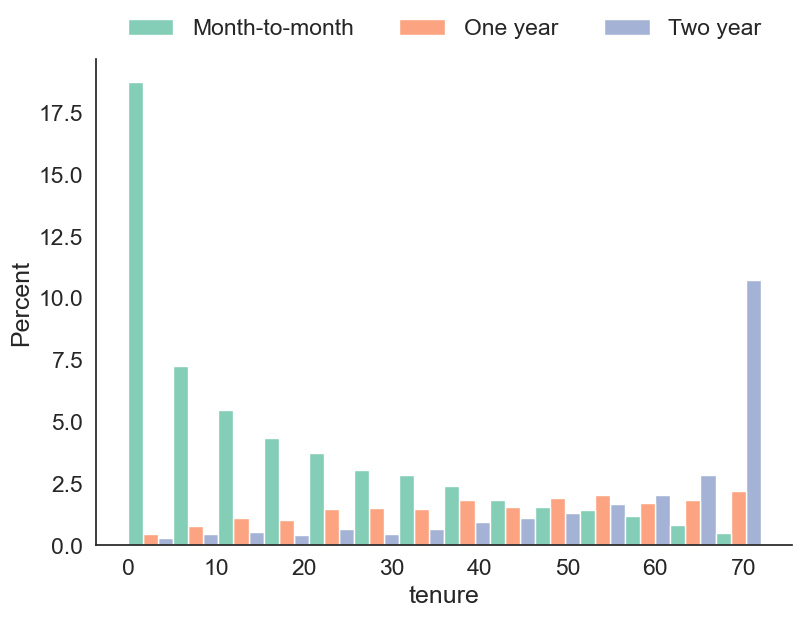

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(8, 6))

# Define a custom color palette for 'contract' categories
palette = {'Month-to-month': '#66c2a5', 'One year': '#fc8d62', 'Two year': '#8da0cb'}

# Create the histogram with custom colors for 'contract'
sns.histplot(data=data_viz, x='tenure', hue='contract', stat='percent', multiple='dodge', ax=ax, binwidth=5, alpha=0.8, palette=palette)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

sns.despine()


plt.show()


In [118]:
# tenure süresi ve kontrat süresi arasındaki trend çok açk bir şekilde gözüküyor.

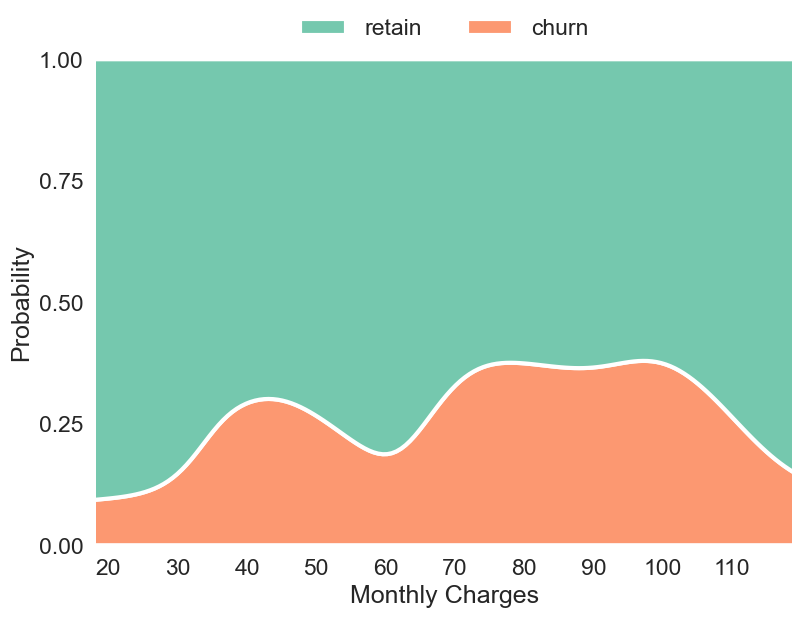

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


palette = {'churn': '#fc8d62', 'retain': '#66c2a5'}

fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')


sns.kdeplot(data=data_viz, x='monthly_charges', hue='churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9,
            palette=palette)


sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)

# Set the ticks and limits for the x-axis
ax.set_xticks(np.arange(0, data_viz['monthly_charges'].max() + 10, 10))
ax.set_xlim(data_viz['monthly_charges'].min(), data_viz['monthly_charges'].max())


ax.set_yticks(np.linspace(0, 1, 5))
ax.set_ylabel('Probability')
ax.set_xlabel('Monthly Charges')


sns.despine(left=True, bottom=True)

plt.show()


In [120]:
# şimdi de numeric değerleri olan sütunların churn ve retain dağılımlarına bakmak istiyorum.


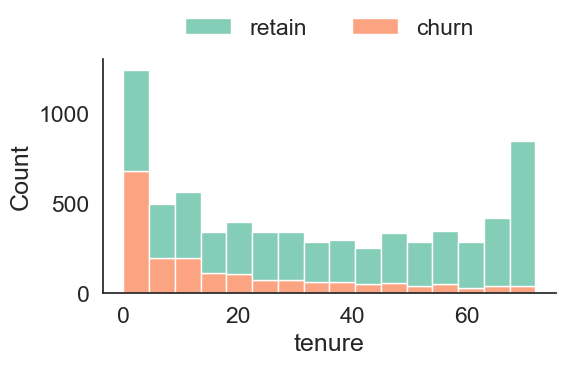

In [121]:
custom_palette = {'churn': '#fc8d62', 'retain': '#66c2a5'}


col = 'tenure'


fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(data=data_viz, x=col, hue='churn', multiple='stack', ax=ax, alpha=0.8, palette=custom_palette)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

plt.tight_layout()
sns.despine()

plt.show()


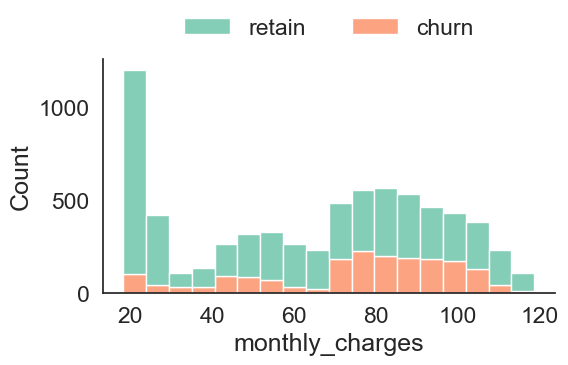

In [122]:
custom_palette = {'churn': '#fc8d62', 'retain': '#66c2a5'}


col = 'monthly_charges'


fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(data=data_viz, x=col, hue='churn', multiple='stack', ax=ax, alpha=0.8, palette=custom_palette)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

plt.tight_layout()
sns.despine()


plt.show()


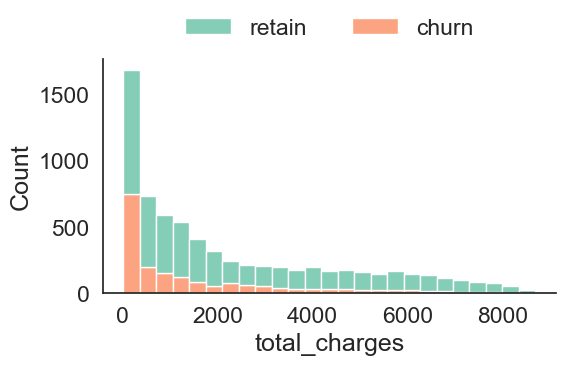

In [123]:
custom_palette = {'churn': '#fc8d62', 'retain': '#66c2a5'}


col = 'total_charges'


fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(data=data_viz, x=col, hue='churn', multiple='stack', ax=ax, alpha=0.8, palette=custom_palette)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

plt.tight_layout()
sns.despine()

plt.show()


## Train - Test Split

In [125]:
data

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             7043 non-null   category
 1   senior_citizen     7043 non-null   object  
 2   partner            7043 non-null   category
 3   dependents         7043 non-null   category
 4   tenure             7043 non-null   int16   
 5   phone_service      7043 non-null   category
 6   multiple_lines     7043 non-null   category
 7   internet_service   7043 non-null   category
 8   online_security    7043 non-null   category
 9   online_backup      7043 non-null   category
 10  device_protection  7043 non-null   category
 11  tech_support       7043 non-null   category
 12  streaming_tv       7043 non-null   category
 13  streaming_movies   7043 non-null   category
 14  contract           7043 non-null   category
 15  paperless_billing  7043 non-null   category
 16  paymen

In [127]:
X = data.drop('churn', axis=1)
y = data['churn']
print(X.shape)
y.shape

(7043, 19)


(7043,)

In [128]:
# veri setini train ve test split olarak bölüyoruz.  Veri setinin %25'ini test olarak belirliyoruz.
# Imbalance olduğu için stratify parametresini y olarak ayarlıyoruz

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42, stratify=y)


In [129]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)


In [130]:
# ikili sınıflandırma olduğu için bir kolon boşa çıkıyor, droplayabiliriz.
ohe = OneHotEncoder(sparse=False, drop='if_binary')

ohe.fit(X_train[column_categorical])

X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [131]:
column_ohe = ohe.get_feature_names_out()
column_ohe


array(['gender_Male', 'senior_citizen_Yes', 'partner_Yes',
       'dependents_Yes', 'phone_service_Yes', 'multiple_lines_Yes',
       'internet_service_DSL', 'internet_service_Fiber optic',
       'internet_service_No', 'online_security_Yes', 'online_backup_Yes',
       'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes',
       'streaming_movies_Yes', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'paperless_billing_Yes',
       'payment_method_Bank transfer (automatic)',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check'],
      dtype=object)

In [132]:
X_train.shape

(5282, 19)

In [133]:
#encoding part

X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)


X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)
X_train_encode.shape
     


(5282, 26)

In [134]:
# Encoding işleminden sonra X_train sütun sayımızın 7 tane arttığını görüyoruz


In [135]:
X_test.shape


(1761, 19)

In [136]:
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)
X_test_encode.shape
     


(1761, 26)

In [137]:
# Encoding işleminden sonra X_test sütun sayımızın 7 tane arttığını görüyoruz


In [138]:
# tüm veri setlerini merge ederek encoding şeklinde kodlanmış nihai data setini yaratıyoruz

data_encode = pd.concat([X_train_encode, X_test_encode], axis=0)

data_encode = data_encode.join(pd.Series(y_train_encode, name='churn', index=X_train_encode.index), lsuffix='_1', rsuffix='_2')

data_encode = data_encode.join(pd.Series(y_test_encode, name='churn', index=X_test_encode.index), lsuffix='_1', rsuffix='_2')


data_encode['churn_1'].fillna(data_encode['churn_2'], inplace=True)
data_encode.drop(columns='churn_2', inplace=True)
data_encode.rename(columns={'churn_1':'churn'}, inplace=True)

data_encode.shape


(7043, 27)

In [139]:
# Min max scale ile veri setinin featurelarını dönüştürüyoruz

In [140]:
X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

for i in column_numerical:
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])


In [141]:
X_train_encode.head(5)

,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,internet_service_DSL,...,streaming_tv_Yes,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
6661,72,53.65,3784.00,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4811,4,46.00,193.60,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2193,56,21.20,1238.65,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1904,56,94.45,5124.60,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6667,9,79.55,723.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [142]:
X_train_scale.head(5)

,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,internet_service_DSL,...,streaming_tv_Yes,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
6661,1.000,0.351,0.434,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4811,0.056,0.275,0.020,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2193,0.778,0.028,0.141,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1904,0.778,0.758,0.589,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6667,0.125,0.609,0.081,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [143]:
# yukarıdaki kod çıktısında min max scale yaparak featureların kat sayılarının belirli bir aralıkta olmasını sağladık. 
# böylelikle featurelar arasında kat sayı farkları oluşmadan modelleme yapabileceğiz. Over fitting riskini azaltmak için yapılan bir işlem

In [144]:
df = X_train_scale

# Minimum ve maksimum değerleri bulmak için bir döngü kullanalım
for column in df.columns:
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"Sütun: {column}, Minimum Değer: {min_value}, Maksimum Değer: {max_value}")


Sütun: tenure, Minimum Değer: 0.0, Maksimum Değer: 1.0
Sütun: monthly_charges, Minimum Değer: 0.0, Maksimum Değer: 1.0
Sütun: total_charges, Minimum Değer: 0.0, Maksimum Değer: 1.0000000000000002
Sütun: gender_Male, Minimum Değer: 0.0, Maksimum Değer: 1.0
Sütun: senior_citizen_Yes, Minimum Değer: 0.0, Maksimum Değer: 1.0
Sütun: partner_Yes, Minimum Değer: 0.0, Maksimum Değer: 1.0
Sütun: dependents_Yes, Minimum Değer: 0.0, Maksimum Değer: 1.0
Sütun: phone_service_Yes, Minimum Değer: 0.0, Maksimum Değer: 1.0
Sütun: multiple_lines_Yes, Minimum Değer: 0.0, Maksimum Değer: 1.0
Sütun: internet_service_DSL, Minimum Değer: 0.0, Maksimum Değer: 1.0
Sütun: internet_service_Fiber optic, Minimum Değer: 0.0, Maksimum Değer: 1.0
Sütun: internet_service_No, Minimum Değer: 0.0, Maksimum Değer: 1.0
Sütun: online_security_Yes, Minimum Değer: 0.0, Maksimum Değer: 1.0
Sütun: online_backup_Yes, Minimum Değer: 0.0, Maksimum Değer: 1.0
Sütun: device_protection_Yes, Minimum Değer: 0.0, Maksimum Değer: 1.0
Süt

In [145]:
# tüm değerler sıfır bir aralığında

In [146]:
# önceki kod hücrelerinde encodeing yapılmış tüm verileri birleştirerek nihai bir veri seti elde ettik.
# şimdi de hem scale edilmiş hem de encoding edilmiş nihai veri setine ulaşıyoruz.
data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)


data_scale = data_scale.join(pd.Series(y_train_encode, name='churn', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')


data_scale = data_scale.join(pd.Series(y_test_encode, name='churn', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')


data_scale['churn_1'].fillna(data_scale['churn_2'], inplace=True)
data_scale.drop(columns='churn_2', inplace=True)
data_scale.rename(columns={'churn_1':'churn'}, inplace=True)

data_scale.shape


(7043, 27)

In [147]:
data_scale_train = pd.concat([X_train_scale, pd.Series(y_train_encode, name='churn', index=X_train_scale.index)], axis=1)
data_scale_train.shape


(5282, 27)

In [148]:
# oversampling

In [149]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data_scale.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')


In [150]:
X_train_scale.isna().sum()

tenure                                      0
monthly_charges                             0
total_charges                               8
gender_Male                                 0
senior_citizen_Yes                          0
partner_Yes                                 0
dependents_Yes                              0
phone_service_Yes                           0
multiple_lines_Yes                          0
internet_service_DSL                        0
internet_service_Fiber optic                0
internet_service_No                         0
online_security_Yes                         0
online_backup_Yes                           0
device_protection_Yes                       0
tech_support_Yes                            0
streaming_tv_Yes                            0
streaming_movies_Yes                        0
contract_Month-to-month                     0
contract_One year                           0
contract_Two year                           0
paperless_billing_Yes             

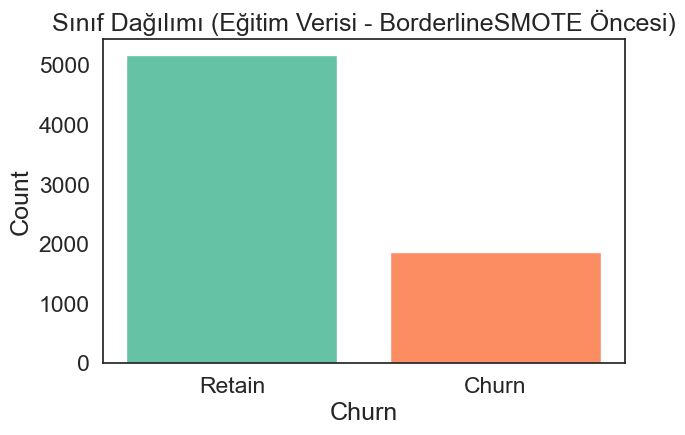

In [151]:
import matplotlib.pyplot as plt


churn_color = '#fc8d62'  
retain_color = '#66c2a5' 


plt.figure(figsize=(6, 4))
plt.bar(data_scale['churn'].value_counts().index, data_scale['churn'].value_counts().values, color=[retain_color, churn_color])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Sınıf Dağılımı (Eğitim Verisi - BorderlineSMOTE Öncesi)')
plt.xticks([0, 1], ['Retain', 'Churn'])
plt.show()


In [152]:
nan_indices = X_train_scale['total_charges'].isna()


In [153]:
mean_total_charges = X_train_scale['total_charges'].mean()
X_train_scale.loc[nan_indices, 'total_charges'] = mean_total_charges

In [154]:
from imblearn.over_sampling import BorderlineSMOTE

borderline_smote = BorderlineSMOTE(random_state=1)
X_train_borderline_smote, y_train_borderline_smote = borderline_smote.fit_resample(X_train_scale, y_train_encode)


In [155]:
from imblearn.over_sampling import BorderlineSMOTE

borderline_smote = BorderlineSMOTE(random_state=1)
X_train_borderline_smote, y_train_borderline_smote = borderline_smote.fit_resample(X_train_scale, y_train_encode)

X_train_smote = pd.DataFrame(X_train_borderline_smote, columns=X_train_scale.columns)
y_train_smote = pd.DataFrame(y_train_borderline_smote, columns=['churn'])

data_borderline_smote = pd.concat([X_train_borderline_smote_df, y_train_borderline_smote_df], axis=1)


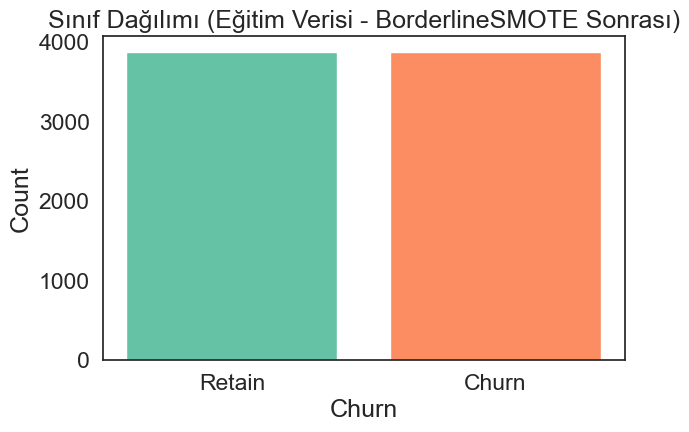

In [156]:
churn_color = '#fc8d62'  
retain_color = '#66c2a5' 

plt.figure(figsize=(6, 4))
plt.bar(data_borderline_smote['churn'].value_counts().index, data_borderline_smote['churn'].value_counts().values, color=[retain_color, churn_color])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Sınıf Dağılımı (Eğitim Verisi - BorderlineSMOTE Sonrası)')
plt.xticks([0, 1], ['Retain', 'Churn'])
plt.show()


## Model Development

In [157]:
# bu fonksiyon daha önce yapılmış bir çalışmadan esinlenmiştir.

def get_score(y_pred_list, y_test, average=None, show=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if show:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df


In [168]:
y_train_encode = y_train_encode.ravel()

In [179]:
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=1),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()


In [180]:
X_test_model.isna().sum()

tenure                                      0
monthly_charges                             0
total_charges                               3
gender_Male                                 0
senior_citizen_Yes                          0
partner_Yes                                 0
dependents_Yes                              0
phone_service_Yes                           0
multiple_lines_Yes                          0
internet_service_DSL                        0
internet_service_Fiber optic                0
internet_service_No                         0
online_security_Yes                         0
online_backup_Yes                           0
device_protection_Yes                       0
tech_support_Yes                            0
streaming_tv_Yes                            0
streaming_movies_Yes                        0
contract_Month-to-month                     0
contract_One year                           0
contract_Two year                           0
paperless_billing_Yes             

In [181]:
nan_indices = X_test_model['total_charges'].isna()
mean_total_charges = X_test_model['total_charges'].mean()
X_test_model.loc[nan_indices, 'total_charges'] = mean_total_charges

In [182]:
y_test_model = y_test_model.reshape(-1, 1)

In [197]:
print(X_train_model.shape)
X_train = X_train_model
print(X_train.shape)


(7760, 26)
(7760, 26)


In [198]:
print(y_train_model.shape)
y_train = y_train_model
print(y_train.shape)

(7760, 1)
(7760, 1)


In [199]:
print(X_test_model.shape)
X_test = X_test_model
print(X_test.shape)

(1761, 26)
(1761, 26)


In [201]:
print(y_test_model.shape)
y_test = y_test_model
print(y_test.shape)

(1761, 1)
(1761, 1)


## Modeling

### XG boost

In [215]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {"learning_rate"    : [0.10, 0.15,0.17 ] ,
 "max_depth"        : [ 3, 4, 5, 6],
 "min_child_weight" : [ 1, 3, 5,],
 "gamma"            : [ 0.1, 0.2, 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5] }

xgb_model = XGBClassifier(tree_method='auto')
random_cfl=RandomizedSearchCV(xgb_model,param_distributions=params,verbose=10,cv=3)
random_cfl.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START colsample_bytree=0.4, gamma=0.2, learning_rate=0.17, max_depth=5, min_child_weight=3
[CV 1/3; 1/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.17, max_depth=5, min_child_weight=3;, score=0.600 total time=   0.1s
[CV 2/3; 1/10] START colsample_bytree=0.4, gamma=0.2, learning_rate=0.17, max_depth=5, min_child_weight=3
[CV 2/3; 1/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.17, max_depth=5, min_child_weight=3;, score=0.886 total time=   0.1s
[CV 3/3; 1/10] START colsample_bytree=0.4, gamma=0.2, learning_rate=0.17, max_depth=5, min_child_weight=3
[CV 3/3; 1/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.17, max_depth=5, min_child_weight=3;, score=0.875 total time=   0.1s
[CV 1/3; 2/10] START colsample_bytree=0.3, gamma=0.4, learning_rate=0.17, max_depth=6, min_child_weight=3
[CV 1/3; 2/10] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.17, max_depth=6, min_child_weight=3;

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5],
                                        'gamma': [0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.1, 0.15, 0.17],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 3, 5]},
                   verbose=10)

In [216]:
#Best Paramaters
random_cfl.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [218]:
params = {
    "learning_rate": [0.10, 0.15,0.17, 0.20],
    "max_depth": [3, 4, 5, 6],
    "min_child_weight": [2, 3, 4],
    "gamma": [ 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5]
}

xgb_model = XGBClassifier(tree_method='auto')


grid_search = GridSearchCV(xgb_model, param_grid=params, verbose=10, cv=3)


grid_search.fit(X_train, y_train)


print("En İyi Parametreler:", grid_search.best_params_)
print("En İyi Skor:", grid_search.best_score_)


Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV 1/3; 1/576] START colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2
[CV 1/3; 1/576] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2;, score=0.724 total time=   0.1s
[CV 2/3; 1/576] START colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2
[CV 2/3; 1/576] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2;, score=0.865 total time=   0.1s
[CV 3/3; 1/576] START colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2
[CV 3/3; 1/576] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2;, score=0.840 total time=   0.1s
[CV 1/3; 2/576] START colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3
[CV 1/3; 2/576] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight

In [219]:
# Initializing the model
xgb_model = XGBClassifier(tree_method='auto',max_depth=3,colsample_bytree=0.3,gamma=0.1,learning_rate=0.1,min_child_weight=4)
xgb_model.fit(X_train,y_train)


thresholds = xgb_model.predict_proba(X_test)[:, 1]

mean = np.mean(thresholds)
std = np.std(thresholds)

print(mean)
print(std)
print(mean+2*std)
print(mean-2*std)


0.34462732
0.2761932
0.8970137238502502
-0.2077590823173523


In [220]:
# Taking np.arange(0,1,0.02) would take a long time to finish execution. An easier 
# way would be to use the spread of thresholds to determine the best threshold
threshold_values = np.arange(mean-2*std,mean+2*std,0.02)
f1_scores = []
for threshold in threshold_values:
    y_pred = (xgb_model.predict_proba(X_test)[:, 1] >= threshold).astype('int')
    f1_scores.append(f1_score(y_test , y_pred))


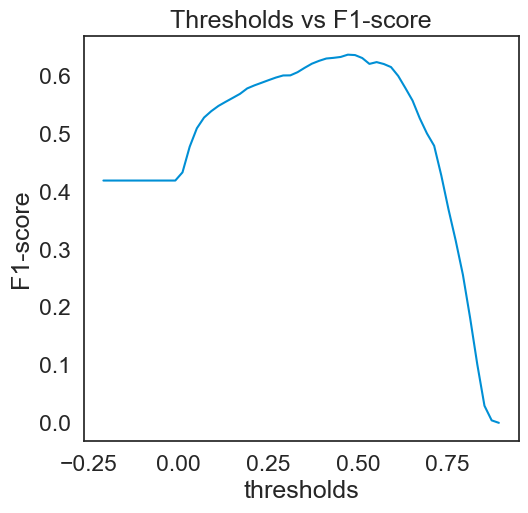

In [221]:
plt.figure(figsize=(5,5))
sns.lineplot(x=threshold_values , y=f1_scores)
plt.xlabel("thresholds")
plt.ylabel("F1-score")
plt.title("Thresholds vs F1-score")

plt.show()


In [222]:
print('Best threshold: ', threshold_values[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))


Best threshold:  0.4722409176826474
Best F1-Score:  0.6370106761565837


In [223]:

from sklearn.metrics import f1_score, classification_report
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


xgb_model = XGBClassifier(tree_method='auto',max_depth=8,colsample_bytree=0.7,gamma=0.0,learning_rate=0.1,min_child_weight=5)

#fitting the model.
xgb_model.fit(X_train, y_train)

#prediction
y_pred_train = (xgb_model.predict_proba(X_train)[:, 1] >= 0.472).astype('int') #setting a threshold.
y_pred_test = (xgb_model.predict_proba(X_test)[:, 1] >= 0.472).astype('int') #setting a threshold.

#Evaluation.
print('Train F1 Score: {}'.format(f1_score(y_pred_train, y_train)))
print('Validation F1 Score: {}'.format(f1_score(y_pred_test, y_test)))
print("-"*50)
print(classification_report(y_pred_test, y_test))


Train F1 Score: 0.9152713080699987
Validation F1 Score: 0.6
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1218
           1       0.65      0.56      0.60       543

    accuracy                           0.77      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.76      0.77      0.77      1761



In [225]:
# Taken from Facebook Recomendation system case study

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()


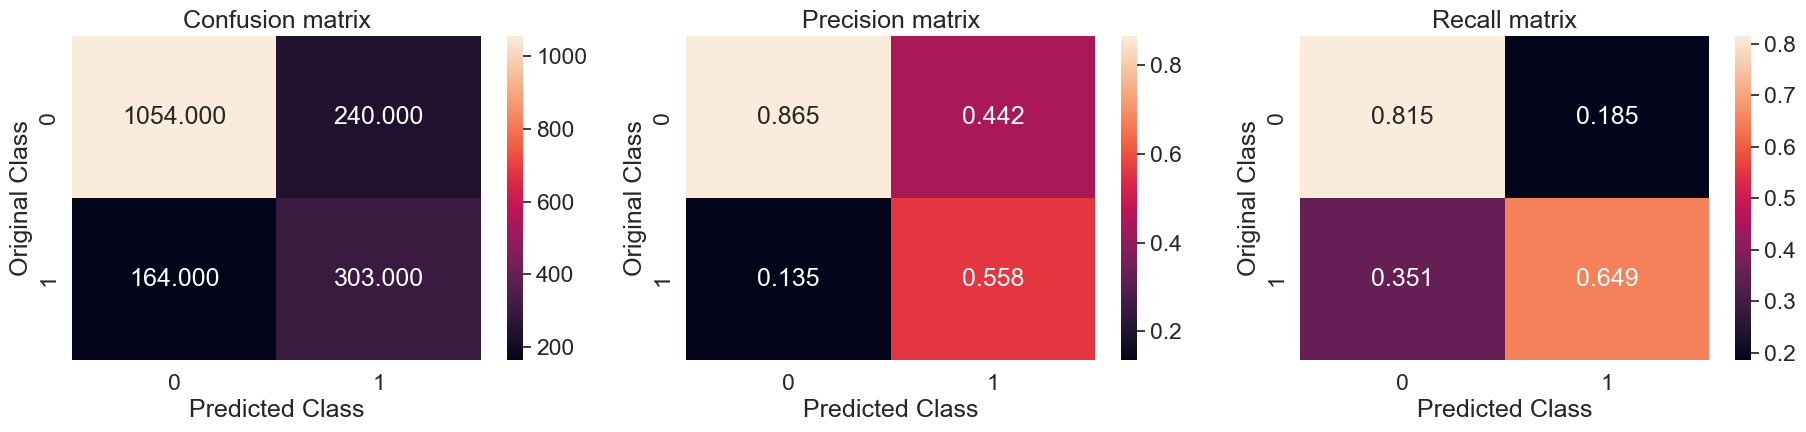

In [226]:
# Confusion, Precision and Recall matrix
plot_confusion_matrix(y_test,y_pred_test)


### Light Gbm

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
'num_leaves': list(range(10, 50, 4)),
'max_depth': [3, 4, 5, 6, 8],
'learning_rate': [0.1, 0.05, 0.01, 0.005],
}

lgb_model=lgb.LGBMClassifier(boosting_type='gbdt',objective='binary')
random_cfl=RandomizedSearchCV(lgb_model,param_distributions=param_grid,verbose=10,n_jobs=-1)
random_cfl.fit(X_train,y_train)


In [246]:
y_train.shape

(7760, 1)

In [248]:
# best parameters 
random_cfl.best_params_

{'num_leaves': 34, 'max_depth': 8, 'learning_rate': 0.05}

In [ ]:
#grid search cv
param_grid_grid = {
    'num_leaves': list(range(34, 50, 2)),
    'max_depth': list(range(8, 15)),
    'learning_rate': [0.03, 0.05,0.07]
}

lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary')
grid_cfl = GridSearchCV(lgb_model, param_grid=param_grid_grid, verbose=10, n_jobs=-1)
grid_cfl.fit(X_train, y_train)



In [277]:
grid_cfl.best_params_

{'learning_rate': 0.07, 'max_depth': 10, 'num_leaves': 48}

In [278]:
# To get the best threshold for max F1 score
# Initializing the model
lgbm = lgb.LGBMClassifier(objective='binary', num_leaves=48, max_depth=10,learning_rate=0.07)
lgbm.fit(X_train,y_train)
thresholds = lgbm.predict_proba(X_test)[:, 1]

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3880, number of negative: 3880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3948
[LightGBM] [Info] Number of data points in the train set: 7760, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [279]:
# To check the mean and standard deviation of thresholds 
mean = np.mean(thresholds)
std = np.std(thresholds)


In [280]:
threshold_values = np.arange(mean-2*std,mean+2*std,0.02)
f1_scores = []
for threshold in threshold_values:
    y_pred = (lgbm.predict_proba(X_test)[:, 1] >= threshold).astype('int')
    f1_scores.append(f1_score(y_test , y_pred))


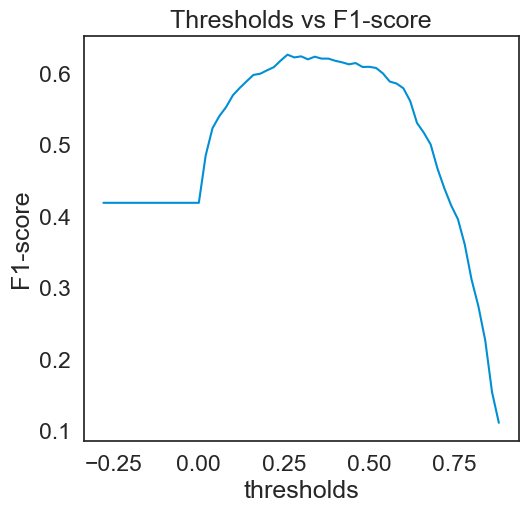

In [281]:
plt.figure(figsize=(5,5))
sns.lineplot(x=threshold_values , y=f1_scores)
plt.xlabel("thresholds")
plt.ylabel("F1-score")
plt.title("Thresholds vs F1-score")

plt.show()


In [282]:
print('Best threshold: ', threshold_values[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))


Best threshold:  0.2601795242855668
Best F1-Score:  0.6262135922330098


In [283]:
# Creating a light gradient boosting model.
from sklearn.metrics import f1_score, classification_report

# Initializing the model
lgbm = lgb.LGBMClassifier(objective='binary', num_leaves=82, max_depth=10,learning_rate=0.05)

# fitting the model.
lgbm.fit(X_train, y_train)

# prediction
# Taking the best threshold as 0.21 from above
y_pred_train = (lgbm.predict_proba(X_train)[:, 1] >= 0.260).astype('int') #setting a threshold.
y_pred_test = (lgbm.predict_proba(X_test)[:, 1] >= 0.260).astype('int') #setting a threshold.

# Evaluation
print('Train F1 Score: {}'.format(f1_score(y_pred_train, y_train)))
print('Validation F1 Score: {}'.format(f1_score(y_pred_test, y_test)))
print("-"*50)
print(classification_report(y_pred_test, y_test))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3880, number of negative: 3880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3948
[LightGBM] [Info] Number of data points in the train set: 7760, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Train F1 Score: 0.8854046575974176
Validation F1 Score: 0.6066350710900473
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       962
           1       0.82      0.48      0.61       799

    accuracy                           0.72      1761
   macro avg       0.75      0.70      0.69      1761
weighted avg       0.7

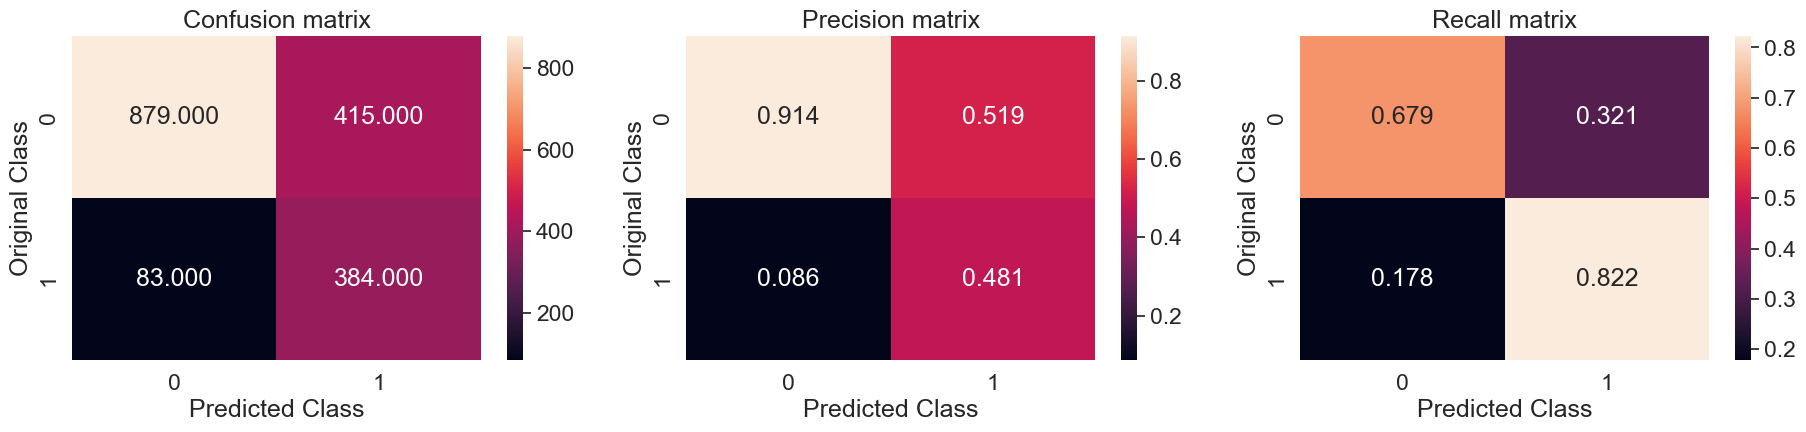

In [284]:
# Confusion, Precision and Recall matrix
plot_confusion_matrix(y_test,y_pred_test)


### Catboost

In [285]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

params = {'depth':[3,4,5,7,8,10,12],
          'iterations':[50,100,200,400]}

cbc_model=CatBoostClassifier(boosting_type='Plain',bootstrap_type='Bernoulli',use_best_model=False)
random_cfl=RandomizedSearchCV(cbc_model,param_distributions=params,verbose=10,cv=3)
y_train = y_train.astype('int')
random_cfl.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START depth=4, iterations=50.....................................
Learning rate set to 0.32415
0:	learn: 0.5962951	total: 2.74ms	remaining: 134ms
1:	learn: 0.5155013	total: 4.71ms	remaining: 113ms
2:	learn: 0.4770324	total: 6.49ms	remaining: 102ms
3:	learn: 0.4641173	total: 8.08ms	remaining: 93ms
4:	learn: 0.4359440	total: 9.72ms	remaining: 87.4ms
5:	learn: 0.3924599	total: 11.6ms	remaining: 84.7ms
6:	learn: 0.3746308	total: 13.1ms	remaining: 80.2ms
7:	learn: 0.3551919	total: 14.8ms	remaining: 77.8ms
8:	learn: 0.3356022	total: 16.8ms	remaining: 76.5ms
9:	learn: 0.3244342	total: 18.2ms	remaining: 73ms
10:	learn: 0.3176559	total: 24ms	remaining: 85ms
11:	learn: 0.3133485	total: 57.9ms	remaining: 183ms
12:	learn: 0.3109185	total: 59.2ms	remaining: 169ms
13:	learn: 0.2994886	total: 60.5ms	remaining: 156ms
14:	learn: 0.2847337	total: 61.9ms	remaining: 144ms
15:	learn: 0.2764187	total: 63.1ms	remaining: 134ms
16:	lea

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x2ae9d9210>,
                   param_distributions={'depth': [3, 4, 5, 7, 8, 10, 12],
                                        'iterations': [50, 100, 200, 400]},
                   verbose=10)

In [286]:
random_cfl.best_params_


{'iterations': 100, 'depth': 12}

In [287]:
# To get the best threshold for max F1 score

# Initializing the model
catboost_model = CatBoostClassifier(depth=12,iterations=100,use_best_model=False)
y_train = y_train.astype('int')
catboost_model.fit(X_train,y_train)
thresholds = catboost_model.predict_proba(X_test)[:, 1]


Learning rate set to 0.204129
0:	learn: 0.5873293	total: 48.3ms	remaining: 4.79s
1:	learn: 0.5138751	total: 83.1ms	remaining: 4.07s
2:	learn: 0.4626537	total: 123ms	remaining: 3.98s
3:	learn: 0.4248924	total: 157ms	remaining: 3.77s
4:	learn: 0.3990342	total: 191ms	remaining: 3.62s
5:	learn: 0.3754640	total: 230ms	remaining: 3.6s
6:	learn: 0.3599007	total: 264ms	remaining: 3.5s
7:	learn: 0.3419250	total: 300ms	remaining: 3.44s
8:	learn: 0.3326979	total: 345ms	remaining: 3.49s
9:	learn: 0.3200524	total: 384ms	remaining: 3.46s
10:	learn: 0.3075603	total: 415ms	remaining: 3.36s
11:	learn: 0.3000375	total: 446ms	remaining: 3.27s
12:	learn: 0.2939358	total: 481ms	remaining: 3.22s
13:	learn: 0.2876300	total: 513ms	remaining: 3.15s
14:	learn: 0.2808536	total: 550ms	remaining: 3.12s
15:	learn: 0.2692233	total: 582ms	remaining: 3.05s
16:	learn: 0.2639726	total: 612ms	remaining: 2.99s
17:	learn: 0.2588440	total: 644ms	remaining: 2.93s
18:	learn: 0.2549475	total: 679ms	remaining: 2.9s
19:	learn: 0

In [288]:
# To check the mean and standard deviation of thresholds 
mean = np.mean(thresholds)
std = np.std(thresholds)


In [289]:
# To get the range of threshold values to calculate f1 score
print(mean)
print(std)
print(mean+2*std)
print(mean-2*std)


0.27518513672086775
0.3206056879849821
0.916396512690832
-0.3660262392490965


In [290]:
# Taking np.arange(0,1,0.02) would take a long time to finish execution. An easier 
# way would be to use the spread of thresholds to determine the best threshold
threshold_values = np.arange(mean-2*std,mean+2*std,0.02)
f1_scores = []
for threshold in threshold_values:
    y_pred = (catboost_model.predict_proba(X_test)[:, 1] >= threshold).astype('int')
    f1_scores.append(f1_score(y_test , y_pred))


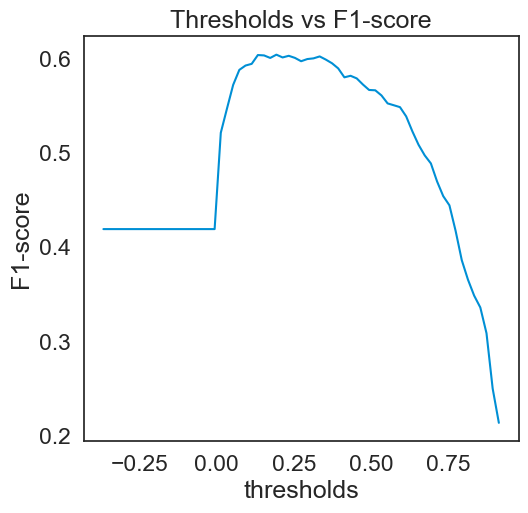

[LightGBM] [Info] Number of data points in the train set: 6208, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[CV 5/5; 107/168] END learning_rate=0.05, max_depth=14, num_leaves=38;, score=0.880 total time=   2.8s
[CV 3/5; 109/168] START learning_rate=0.05, max_depth=14, num_leaves=42.........
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3104, number of negative: 3104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1813
[LightGBM] [Info] Number of data points in the train set: 6208, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[CV 3/5; 109/168] END learning_rate=0.05, max_depth=14, num_leave

In [291]:
plt.figure(figsize=(5,5))
sns.lineplot(x = threshold_values , y = f1_scores)
plt.xlabel("thresholds")
plt.ylabel("F1-score")
plt.title("Thresholds vs F1-score")

plt.show()


In [292]:
print('Best threshold: ', threshold_values[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))


Best threshold:  0.193973760750904
Best F1-Score:  0.6043046357615893


In [293]:
# Initializing the model
catboost_model = CatBoostClassifier(depth=12,iterations=100,use_best_model=False)

#fitting the model.
y_train = y_train.astype('int')
catboost_model.fit(X_train, y_train)

#prediction
y_pred_train = (catboost_model.predict_proba(X_train)[:, 1] >= 0.193).astype('int') #setting a threshold.
y_pred_test = (catboost_model.predict_proba(X_test)[:, 1] >= 0.193).astype('int') #setting a threshold.


Learning rate set to 0.204129
0:	learn: 0.5873293	total: 45.1ms	remaining: 4.47s
1:	learn: 0.5138751	total: 81.5ms	remaining: 3.99s
2:	learn: 0.4626537	total: 123ms	remaining: 3.96s
3:	learn: 0.4248924	total: 158ms	remaining: 3.8s
4:	learn: 0.3990342	total: 194ms	remaining: 3.68s
5:	learn: 0.3754640	total: 230ms	remaining: 3.61s
6:	learn: 0.3599007	total: 267ms	remaining: 3.55s
7:	learn: 0.3419250	total: 309ms	remaining: 3.55s
8:	learn: 0.3326979	total: 364ms	remaining: 3.68s
9:	learn: 0.3200524	total: 398ms	remaining: 3.58s
10:	learn: 0.3075603	total: 430ms	remaining: 3.48s
11:	learn: 0.3000375	total: 463ms	remaining: 3.39s
12:	learn: 0.2939358	total: 496ms	remaining: 3.32s
13:	learn: 0.2876300	total: 531ms	remaining: 3.26s
14:	learn: 0.2808536	total: 563ms	remaining: 3.19s
15:	learn: 0.2692233	total: 596ms	remaining: 3.13s
16:	learn: 0.2639726	total: 626ms	remaining: 3.05s
17:	learn: 0.2588440	total: 654ms	remaining: 2.98s
18:	learn: 0.2549475	total: 687ms	remaining: 2.93s
19:	learn:

In [296]:
# Evaluation
print('Train F1 Score: {}'.format(f1_score(y_pred_train, y_train)))
print('Validation F1 Score: {}'.format(f1_score(y_pred_test, y_test)))
print("-"*50)
print(classification_report(y_pred_test, y_test))

Train F1 Score: 0.9443700547778454
Validation F1 Score: 0.6043046357615893
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      1020
           1       0.78      0.49      0.60       741

    accuracy                           0.73      1761
   macro avg       0.75      0.70      0.70      1761
weighted avg       0.74      0.73      0.71      1761



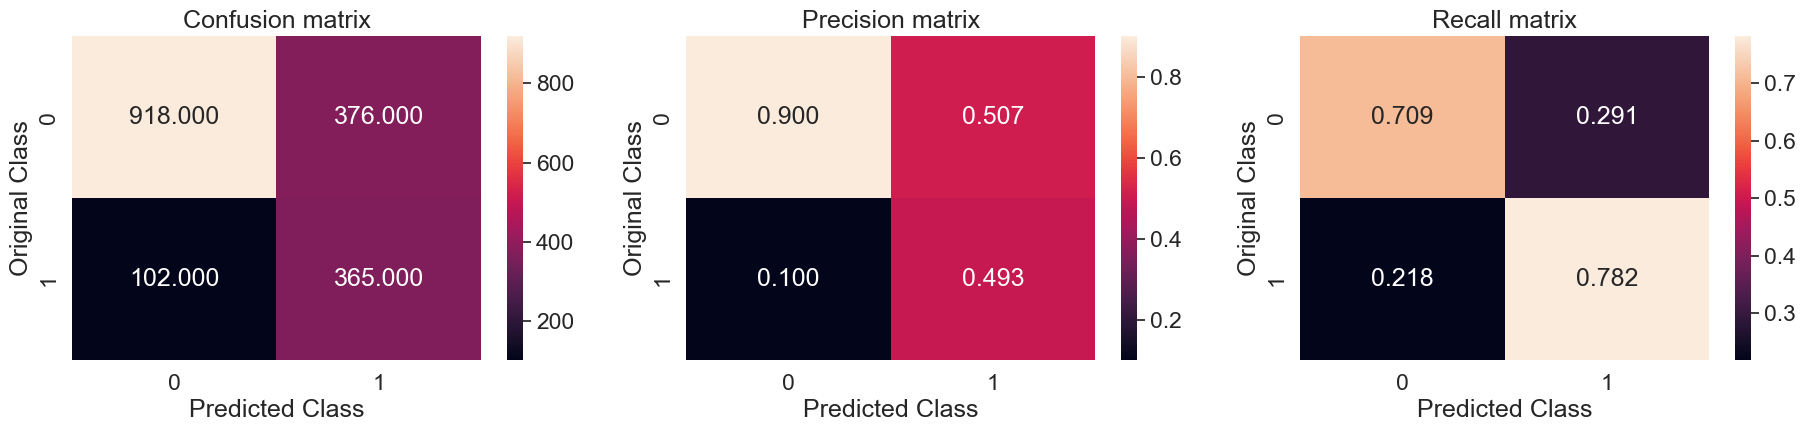

In [297]:
# Confusion, Precision and Recall matrix
plot_confusion_matrix(y_test,y_pred_test)
